In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%autoreload 

import sys
sys.path.append('../../..')
import pickle

import numpy as np
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import matplotlib.colors as colors
%matplotlib inline

import darkhistory.physics as phys
import main
import config


Bad key text.latex.preview in file ../../matplotlibrc, line 10 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [24]:
config.test()

Running main.evolve(...): 
******************************************
Testing solution with no DM: 


  0%|          | 0/414.0 [00:00<?, ?it/s]

/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


The maximum relative change in xHI and xHeI is:  0.0
The maximum relative change in Tm is:  0.0
The maximum relative change in f_(H ion) is:  0.0
The maximum relative change in f_(H ion) is:  0.0
The maximum relative change in f_(He ion) is:  0.0
The maximum relative change in f_(Lya) is:  0.0
The maximum relative change in f_(heat) is:  0.0
The maximum relative change in f_(cont) is:  0.0
The maximum relative change in the MLA parameters is:  inf
Pickled solution with no DM!


  0%|          | 0/414.0 [00:00<?, ?it/s]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../config.py", line 675, in test
    DM_res = main.evolve(**DM_options_dict)
  File "/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../main.py", line 1089, in evolve
    get_tf(
  File "/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../main.py", line 1300, in get_tf
    lowengelec_tf = lowengelec_tf_interp.get_tf(
  File "/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/transferfunclist.py", line 683, in get_tf
    rs_regime_interp_func([func(xH), func(xHe), func(rs)])
  File "/home/hongwanl/.conda/envs/DarkHistory/lib/python3.8/site-packages/scipy/interpolate/interpolate.py", line 2522, in __call__
    result = self._evaluate_linear(indices,
  File "/home/hongwanl/.conda/envs/DarkHistory/lib/python3.8/site-packages/scipy/interpolate/interpolate.py", line 2546, in _evaluate_linear
    values += np.asarray(sel

In [26]:
test_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/std_test_data.p', 'rb'))

ref_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220818_std_result_n_10_high_rs_1555_coarsen_16_reion_False_rtol_1e-6.p', 'rb'))

In [28]:
print(test_data['MLA'][1:])
print(ref_data['MLA'][1:])

[[3.40649712e-13 2.91323343e-13 2.94475313e-13 ... 5.96034193e-11
  6.05631204e-11 6.15383210e-11]
 [2.57671433e+00 2.15827855e+00 1.56017548e+00 ... 6.52991802e-65
  5.18875126e-65 4.12713677e-65]
 [0.00000000e+00 4.76311454e-48 1.59033636e-36 ... 9.00997435e-52
  8.42520904e-52 7.87808233e-52]]
[[3.40649712e-13 2.91323343e-13 2.94475313e-13 ... 5.96034193e-11
  6.05631204e-11 6.15383210e-11]
 [2.57671433e+00 2.15827855e+00 1.56017548e+00 ... 6.52991802e-65
  5.18875126e-65 4.12713677e-65]
 [0.00000000e+00 4.76311454e-48 1.59033636e-36 ... 9.00997435e-52
  8.42520904e-52 7.87808233e-52]]


In [94]:
options_dict = {
    'primary':'elec_delta', 'DM_process':'decay', 'mDM':1e8, 'lifetime':3e25,
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4,
    'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 
    'recfast_TLA':True, 'MLA_funcs':None,
    'reprocess_distortion':True, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True
}

options_dict_std = {
    'primary':'elec_delta', 'DM_process':'decay', 'mDM':1e8, 'lifetime':3e40,
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4,
    'reion_switch':False, 'reion_method':'Puchwein', 'heat_switch':True,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 
    'recfast_TLA':True, 'MLA_funcs':None,
    'reprocess_distortion':True, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True
}

In [96]:
# %%prun 
res = main.evolve(**options_dict)
# res_std = main.evolve(**options_dict_std)

  0%|          | 0/414.0 [00:00<?, ?it/s]

/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7318223210112D+01   r2 = -0.4205083171435D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7202063395333D+01   r2 = -0.2506267322938D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7087747348118D+01   r2 = -0.4114047054148D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7087747348118D+01   r2 = -0.9345514766044D-16
 lsoda--  warning..internal t (=r1) 

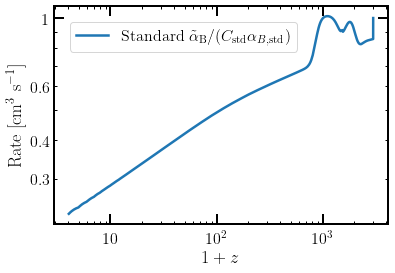

In [97]:
plt.figure()

plt.loglog()

res_rs = res['MLA'][0]
x_std = phys.x_std(res_rs)
Tm_std = phys.Tm_std(res_rs)

C_times_alpha_B = phys.peebles_C(x_std, res_rs) * phys.alpha_recomb(Tm_std, 'HI')


# plt.plot(res['MLA'][0], res['MLA'][1,:], label=r'DM $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B,\mathrm{std}})$')
plt.plot(res_std['MLA'][0], res_std['MLA'][1,:] / C_times_alpha_B, label=r'Standard $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B, \mathrm{std}})$')
# plt.plot(res_std_2['MLA'][0], res_std_2['MLA'][1,:] / C_times_alpha_B, label=r'Standard $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B, \mathrm{std}})$')
# plt.plot(res_std['MLA'][0], res_std['MLA'][1,:] / res_std_2['MLA'][1,:])
# plt.plot(res_rs, C_times_alpha_B, 'k--', label=r'$C_\mathrm{std} \alpha_{B, \mathrm{std}}$')



plt.xlabel(r'$1+z$')
plt.ylabel(r'Rate [cm$^{3}$ s$^{-1}$]')
plt.legend()

# plt.xlim(1e3, 3e3)

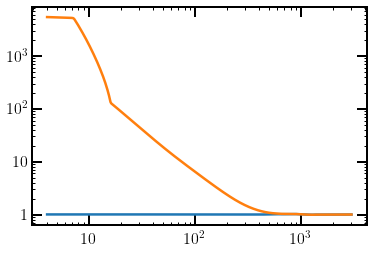

In [101]:
plt.figure()

plt.loglog()

plt.plot(res_std['rs'], res_std['x'][:,0] / phys.x_std(res_std['rs']))

plt.plot(res['rs'], res['x'][:,0] / phys.x_std(res['rs']))


# plt.xlim(20, 3000)
# plt.ylim(0.975, 1.025)

In [102]:
pickle.dump(res, open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220818_mDM_1e8_elec_delta_decay_3e25_n_10_high_rs_1555_coarsen_16_reion_True_rtol_1e-6.p', 'wb'))

In [10]:
ref_res = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220818_mDM_1e8_elec_delta_decay_3e25_n_10_high_rs_1555_coarsen_16_reion_True_rtol_1e-6.p', 'rb'))

In [1]:
print(np.nanmax(np.abs(ref_res['x'] / res['x'] - 1)))
print(np.nanmax(np.abs(ref_res['Tm'] / res['Tm'] - 1)))
print(np.nanmax(np.abs(ref_res['f']['H ion'] / res['f']['H ion'] - 1)))
print(np.nanmax(np.abs(ref_res['MLA'][1:] / res['MLA'][1:] - 1)))

NameError: name 'np' is not defined

In [11]:
ref_res.keys()

dict_keys(['rs', 'x', 'Tm', 'highengphot', 'lowengphot', 'lowengelec', 'distortions', 'distortion', 'f', 'MLA'])

In [13]:
ref_res['f'].keys()

dict_keys(['H ion', 'He ion', 'Lya', 'heat', 'cont', 'err'])